In [1]:
import pandas as pd
from math import fsum
from sklearn.metrics import classification_report as report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# We get all our predictions
hatebert_in = pd.read_csv('data/hateBERT_indomain.csv')
hatebert_cross = pd.read_csv('data/hateBERT_crossdomain.csv')

bert_in = pd.read_csv('data/BERT_indomain.csv')
bert_cross = pd.read_csv('data/BERT_crossdomain.csv')

svm_in = pd.read_csv('data/SVM_indomain.csv').drop(['Unnamed: 0'], axis=1)
svm_cross = pd.read_csv('data/SVM_crossdomain.csv').drop(['Unnamed: 0'], axis=1)

# Dataframes to write results in
test_indomain = pd.read_csv('data/olid-test.csv')
test_crossdomain = pd.read_csv('data/olid-test.csv')

In [3]:
# We implement soft voting, the class with highest summed probability from each classifier is picked for each instance
def soft_voting(df1, df2 ,df3):
    ensemble_predictions = []
    for p1, p2, p3,\
    pn1, pn2, pn3\
    in zip(df1.p_pos, df2.p_pos, df3.p_pos,\
          df1.p_neg, df2.p_neg, df3.p_neg):
        if fsum([p1, p2, p3]) >= fsum([pn1, pn2, pn3]):
            ensemble_predictions.append(1)
        else:
            ensemble_predictions.append(0)
    return ensemble_predictions    

In [4]:
# we get results for both in domain and cross domain
test_indomain['predictions'] = soft_voting(hatebert_in, bert_in, svm_in)

test_crossdomain['predictions'] = soft_voting(hatebert_cross, bert_cross, svm_cross)

In [5]:
# Writing results to disk
test_indomain.to_csv('data/SOFTVOTING_indomain.csv', index=False)

test_crossdomain.to_csv('data/SOFTVOTING_crossdomain.csv', index=False)

In [6]:
# Classification report In Domain
print(report(test_indomain.labels, test_indomain.predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       620
           1       0.76      0.63      0.69       240

    accuracy                           0.84       860
   macro avg       0.81      0.78      0.79       860
weighted avg       0.84      0.84      0.84       860



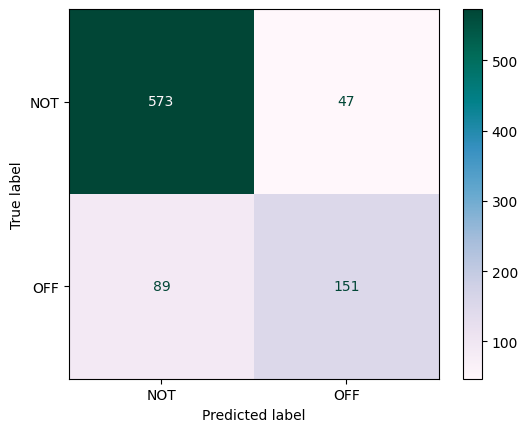

In [7]:
# Confusion matrix In Domain
ConfusionMatrixDisplay.from_predictions(test_indomain.labels, test_indomain.predictions, cmap='PuBuGn', display_labels=["NOT", "OFF"])

In [8]:
# Classification report Cross Domain
print(report(test_crossdomain.labels, test_crossdomain.predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       620
           1       0.68      0.51      0.58       240

    accuracy                           0.80       860
   macro avg       0.75      0.71      0.72       860
weighted avg       0.79      0.80      0.79       860



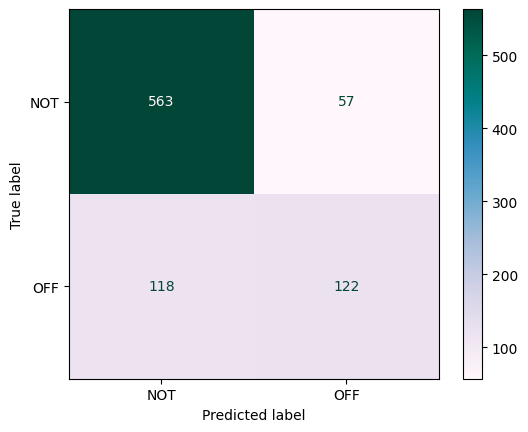

In [9]:
# Confusion matrix Cross Domain
ConfusionMatrixDisplay.from_predictions(test_crossdomain.labels, test_crossdomain.predictions, cmap='PuBuGn', display_labels=["NOT", "OFF"])